In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults, ARIMAResults
from matplotlib.pyplot import acorr
import sys
print sys.version
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import adfuller
import Quandl
%pylab inline

2.7.11 (default, Dec  5 2015, 14:44:47) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.1.76)]
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [228]:
short = pd.read_csv('http://people.stern.nyu.edu/churvich/Forecasting/Data/SHORT.M')
long_df = pd.read_csv('http://people.stern.nyu.edu/churvich/Forecasting/Data/LONG.M')
print len(short)

147


In [229]:
print short.head()
print ''
print long_df.head()

   .99 
0  2.32
1  2.47
2  2.42
3  2.40
4  2.38

   4.11 
0   4.23
1   4.36
2   4.19
3   4.13
4   3.94


In [230]:
short = short.shift(periods=1)
short.columns=['short']
short[0:1] = .99
short.head()

,short
0,0.99
1,2.32
2,2.47
3,2.42
4,2.40


In [231]:
long_df = long_df.shift(periods=1)
long_df.columns=['long']
long_df[0:1] = 4.11
long_df.head()

,long
0,4.11
1,4.23
2,4.36
3,4.19
4,4.13


In [232]:
data = long_df
data['short'] = short
data['spread'] = data['long'] - data['short']
data['log'] = np.log(data.spread)
data['diff_log'] = data.log - data.log.shift(periods = -1)
data['diff'] = data.spread - data.spread.shift(periods = -1)
data = data.dropna()

print data.head()
print ''
print len(data)

   long  short  spread       log  diff_log  diff
0  4.11   0.99    3.12  1.137833  0.490730  1.21
1  4.23   2.32    1.91  0.647103  0.010526  0.02
2  4.36   2.47    1.89  0.636577  0.065597  0.12
3  4.19   2.42    1.77  0.570980  0.022858  0.04
4  4.13   2.40    1.73  0.548121  0.103436  0.17

116


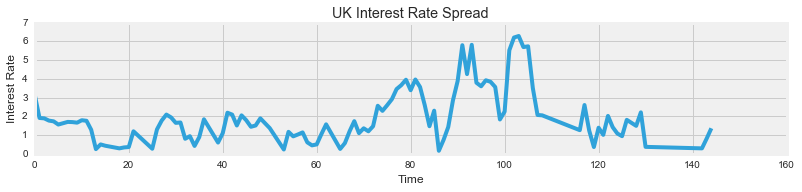

In [233]:
fig, ax = plt.subplots(figsize=(12,8))
plt.subplot(311)
plt.plot(data.spread)
plt.title('UK Interest Rate Spread')
plt.ylabel('Interest Rate')
plt.xlabel('Time')

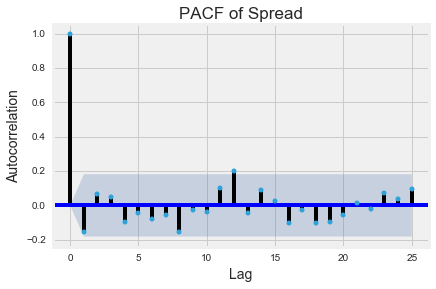

In [235]:
# plot the PACF
plot_pacf(data.diff_log, lags = 25)
plt.xlabel('Lag', fontsize = 14)
plt.ylabel('Autocorrelation', fontsize = 14)
plt.title('PACF of Spread', fontsize = 17)

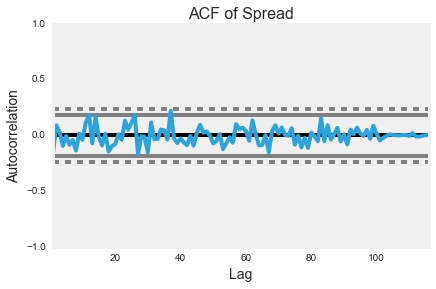

In [237]:
# then plot the ACF
autocorrelation_plot(data.diff_log)
plt.xlabel('Lag', fontsize = 14)
plt.ylabel('Autocorrelation', fontsize = 14)
plt.title('ACF of Spread', fontsize= 16)

# Question 2

In [238]:
import statsmodels.formula.api as smf

In [239]:
data.tail()

,long,short,spread,log,diff_log,diff
129,10.57,8.36,2.21,0.792993,1.787245,1.84
130,11.67,11.30,0.37,-0.994252,-0.783531,-0.44
142,9.23,8.94,0.29,-1.237874,-1.027153,-0.52
143,9.68,8.87,0.81,-0.210721,-0.518206,-0.55
144,9.57,8.21,1.36,0.307485,0.052842,0.07


In [240]:
first = list(data.log[1:])
second = list(data.log[:-1])

In [241]:
mod = smf.OLS(first,second).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     121.1
Date:                Tue, 03 May 2016   Prob (F-statistic):           1.26e-19
Time:                        21:11:09   Log-Likelihood:                -107.65
No. Observations:                 115   AIC:                             217.3
Df Residuals:                     114   BIC:                             220.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7129      0.065     11.003      0.0

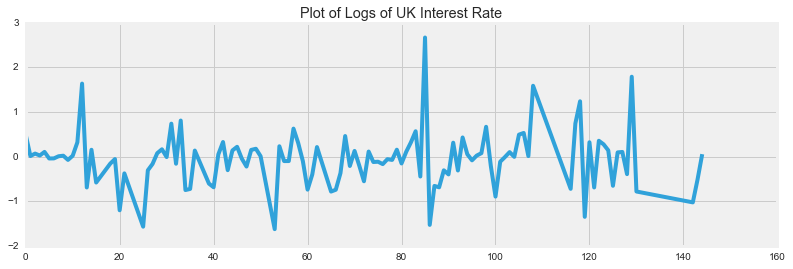

In [242]:
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(data.diff_log)
plt.title('Plot of Logs of UK Interest Rate')

In [243]:
root_test = float((mod.params - 1)/mod.bse)
root_test

-4.4305352434482055

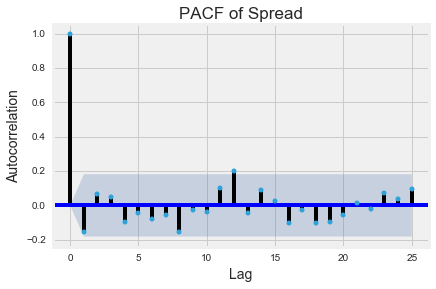

In [244]:
# plot the PACF
plot_pacf(data.diff_log, lags = 25)
plt.xlabel('Lag', fontsize = 14)
plt.ylabel('Autocorrelation', fontsize = 14)
plt.title('PACF of Spread', fontsize = 17)

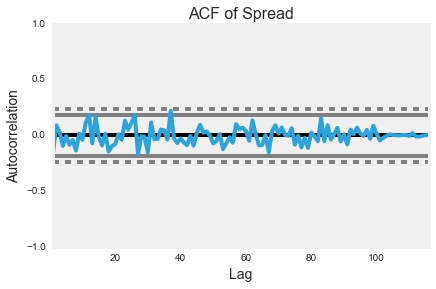

In [245]:
# then plot the ACF
autocorrelation_plot(data.diff_log)
plt.xlabel('Lag', fontsize = 14)
plt.ylabel('Autocorrelation', fontsize = 14)
plt.title('ACF of Spread', fontsize= 16)

In [247]:
print 'The sample mean is %s' % np.mean(data.diff_log)
print ''
print 'The sample standard deviation is %s' % np.std(data.diff_log)

The sample mean is -0.0538027583911

The sample standard deviation is 0.618032883208


In [250]:
#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(data.spread, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                  -3.348699
p-value                          0.012837
# Lags Used                      0.000000
Number of Observations Used    115.000000
Critical Value (5%)             -2.887020
Critical Value (1%)             -3.488535
Critical Value (10%)            -2.580360
dtype: float64
